In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import xarray as xr
import rasterio
import lxml 
import math

from rasterio.crs import CRS
from pyproj import Transformer
import numpy as np
from shapely.geometry import Point, Polygon

In [2]:
land_dir = r"C:\Users\bmaro\OneDrive\Desktop\LandCharacter"
print(os.listdir(land_dir))


illinois_stateplane = CRS.from_epsg(26971)  # Illinois State Plane East (NAD83)

wgs84 = CRS.from_epsg(4326)  # WGS84 Latitude/Longitude

['README-info-560_013.txt', 'SAVANT_10cm_DEM.tif', 'SAVANT_1m_contours.png', 'SAVANT_1m_DEM.kml', 'SAVANT_1m_DEM.tfw', 'SAVANT_1m_DEM.tif', 'SAVANT_1m_DEM_projected.asc', 'SAVANT_1m_DEM_projected.prj', 'SAVANT_1m_DEM_projected.tif', 'SAVANT_Agisoft_Report.pdf', 'SAVANT_DEM_and_orthophoto_readme.pdf', 'SAVANT_ortho_10cm.tif', 'SAVANT_ortho_reduced.png']


CRS: EPSG:26971
Bounds: BoundingBox(left=292962.0199249191, bottom=392905.76987422816, right=294658.0199249191, top=394002.76987422816)
Transform: | 1.00, 0.00, 292962.02|
| 0.00,-1.00, 394002.77|
| 0.00, 0.00, 1.00|
Elevation shape: (1097, 1696)
Units: metre


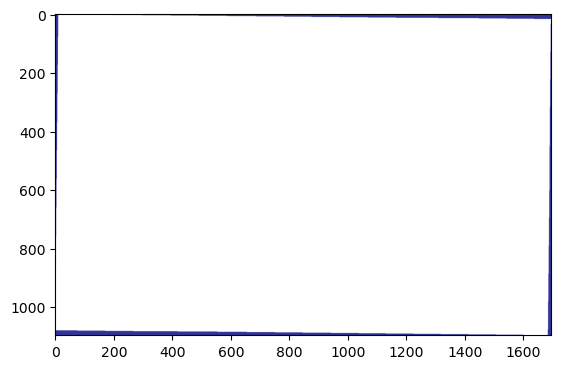

In [3]:
dem_10cm = 'SAVANT_10cm_DEM.tif'
dem_1m_proj = 'SAVANT_1m_DEM_projected.tif'

with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")
    print(f"Transform: {transform}")
    print(f"Elevation shape: {elevation.shape}")
    print(f"Units: {src.units[0]}")
    plt.imshow(elevation, cmap='terrain')
    plt.show()
    

In [4]:
# build dictionary of tower locations
towers = {}
towers['init'] = {'name':'init','label':'Initiation Tower'}
towers['rel'] = {'name':'rel','label':'Release Tower'}
towers['uconv'] = {'name':'uconv','label':'Upper Convergence Tower'}
towers['lconv'] = {'name':'lconv','label':'Lower Convergence Tower'}


In [5]:
towers['init']['lat_lon_str'] = "40°12′41.4576′′N,88°24′37.98′′W"
towers['rel']['lat_lon_str'] = "40°12 ′42.1596′′N,88°24′26.046′′W"
towers['uconv']['lat_lon_str'] = "40°12 ′39.783′′N,88°24′19.605′′W"
towers['lconv']['lat_lon_str'] = "40°12 ′36.9′′N,88°24′13.3′′W"

def deg_to_dec(coord_str):
    lat_str, lon_str = coord_str.split(',')

    lat_dec = round(float(lat_str.split('°')[0]) 
               + float(lat_str.split('°')[1].split('′')[0])/60
               + float(lat_str.split('°')[1].split('′')[1].split('′′')[0])/3600, 6)
    lon_dec = round(float(lon_str.split('°')[0]) 
               + float(lon_str.split('°')[1].split('′')[0])/60 
               + float(lon_str.split('°')[1].split('′')[1].split('′′')[0])/3600, 6)

    if "s" in coord_str.lower():
        lat_dec = (lat_dec*-1)
    if "w" in coord_str.lower():
        lon_dec = (lon_dec*-1)
        
    return [(lat_dec), (lon_dec)]


for tower, data in towers.items():
    print(f"{tower}: {data}")
    coords=deg_to_dec(towers[tower]['lat_lon_str'])
    towers[tower]['lat_lon'] = coords
    transformer = Transformer.from_crs(wgs84, illinois_stateplane, always_xy=True)
    x, y = transformer.transform(coords[1], coords[0])
    towers[tower]['x_y'] = [x, y]
    print(f"  lat/lon: {towers[tower]['lat_lon']}, projected x/y: {towers[tower]['x_y']}")






init: {'name': 'init', 'label': 'Initiation Tower', 'lat_lon_str': '40°12′41.4576′′N,88°24′37.98′′W'}
  lat/lon: [40.211516, -88.41055], projected x/y: [293426.78451102215, 393488.8263018386]
rel: {'name': 'rel', 'label': 'Release Tower', 'lat_lon_str': '40°12 ′42.1596′′N,88°24′26.046′′W'}
  lat/lon: [40.211711, -88.407235], projected x/y: [293709.00153141556, 393510.23896109697]
uconv: {'name': 'uconv', 'label': 'Upper Convergence Tower', 'lat_lon_str': '40°12 ′39.783′′N,88°24′19.605′′W'}
  lat/lon: [40.211051, -88.405446], projected x/y: [293861.23548035475, 393436.8307068228]
lconv: {'name': 'lconv', 'label': 'Lower Convergence Tower', 'lat_lon_str': '40°12 ′36.9′′N,88°24′13.3′′W'}
  lat/lon: [40.21025, -88.403694], projected x/y: [294010.3102076547, 393347.77200289717]


CRS: EPSG:26971
Bounds: BoundingBox(left=292962.0199249191, bottom=392905.76987422816, right=294658.0199249191, top=394002.76987422816)
Transform: | 1.00, 0.00, 292962.02|
| 0.00,-1.00, 394002.77|
| 0.00, 0.00, 1.00|
Elevation shape: (1097, 1696)
Units: metre
elevation at Initiation Tower: 235.9046173095703 m
Initiation Tower: col=464, row=513, shape=(1097, 1696)
elevation at Release Tower: 235.08413696289062 m
Release Tower: col=746, row=492, shape=(1097, 1696)
elevation at Upper Convergence Tower: 233.22525024414062 m
Upper Convergence Tower: col=899, row=565, shape=(1097, 1696)
elevation at Lower Convergence Tower: 231.7415771484375 m
Lower Convergence Tower: col=1048, row=654, shape=(1097, 1696)


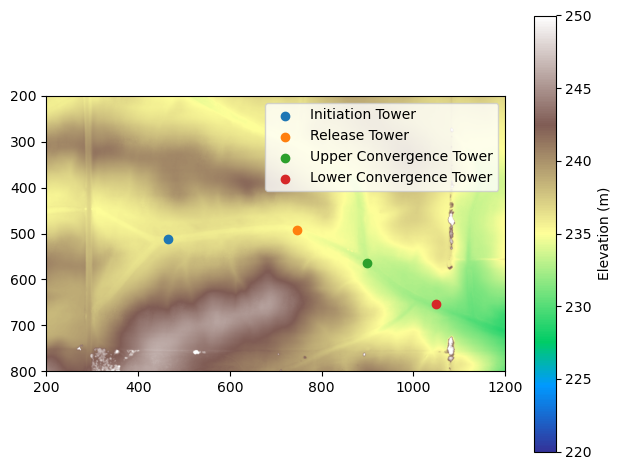

In [6]:
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")
    print(f"Transform: {transform}")
    print(f"Elevation shape: {elevation.shape}")
    print(f"Units: {src.units[0]}")
    plt.imshow(elevation, cmap='terrain', vmin=220, vmax=250)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        print(f'elevation at {data["label"]}: {elevation[row, col]} m')
        towers[tower]['elvation'] = elevation[row, col]
        print(f"{data['label']}: col={col}, row={row}, shape={elevation.shape}")
        plt.scatter(col, row, label=data['label'])
    plt.xlim(200, 1200)
    plt.ylim(800, 200)
    plt.legend()
    plt.tight_layout()
    plt.show()

100 m at 45° from Initiation Tower: row=443, col=535, elevation=237.5460968017578 m


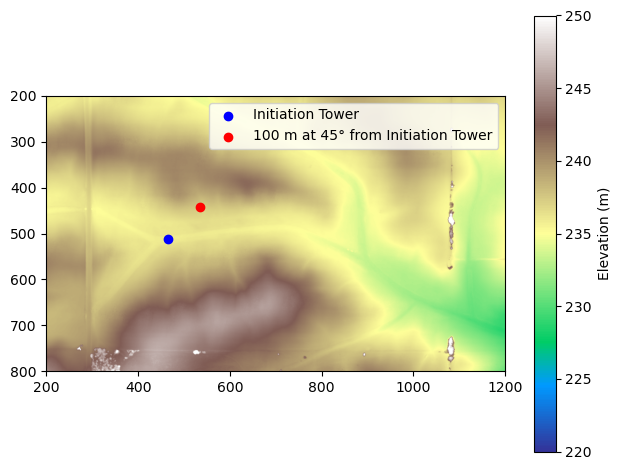

In [7]:
# Create a funciton to get row column at a distance and bearing from a tower
def get_row_col_from_tower(tower_key, distance_m, bearing_deg):
    tower = towers[tower_key]
    x0, y0 = tower['x_y']
    bearing_rad = np.deg2rad(bearing_deg)
    x_new = x0 + distance_m * np.sin(bearing_rad)
    y_new = y0 + distance_m * np.cos(bearing_rad)
    row, col = rasterio.transform.rowcol(transform, x_new, y_new)
    if 0 <= row < elevation.shape[0] and 0 <= col < elevation.shape[1]:
        elev = elevation[row, col]
    else:
        elev = None
    return row, col, elev
# Example usage
direction = 45  # degrees
distance = 100  # meters
row, col, elev = get_row_col_from_tower('init', distance, direction)
print(f"{distance} m at {direction}° from Initiation Tower: row={row}, col={col}, elevation={elev} m")
# plot point on map
plt.imshow(elevation, cmap='terrain', vmin=220, vmax=250)
plt.colorbar(label='Elevation (m)')
init_row, init_col = rasterio.transform.rowcol(transform, towers['init']['x_y'][0], towers['init']['x_y'][1])
plt.scatter(init_col, init_row, color='blue', label='Initiation Tower')
plt.scatter(col, row, color='red', label=f'{distance} m at {direction}° from Initiation Tower')
plt.xlim(200, 1200)
plt.ylim(800, 200)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Store the elevation profiles at any distance steps and bearings from each tower
distance_steps = [100]  
bearing_steps = np.arange(0, 360, 1)  # 0 to 359 degrees in 10 degree steps

elevation_points = pd.DataFrame(columns=['tower', 'distance', 'bearing', 'row', 'col', 'elevation', 'delta_elevation'])
for tower_key in towers.keys():
    for distance in distance_steps:
        for bearing in bearing_steps:
            row, col, elev = get_row_col_from_tower(tower_key, distance, bearing)
            if elev is not None:
                delta_elev = elev - towers[tower_key]['elvation']
            else:
                delta_elev = None
            temp_df = [tower_key, distance, bearing,  row, col, elev, delta_elev]
            elevation_points = pd.concat([elevation_points, pd.DataFrame([temp_df], columns=elevation_points.columns)], ignore_index=True)
            
    print(f"Elevation profile created for {tower_key}")

elevation_points

C:\Users\bmaro\AppData\Local\Temp\ipykernel_10496\1535118119.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  elevation_points = pd.concat([elevation_points, pd.DataFrame([temp_df], columns=elevation_points.columns)], ignore_index=True)


Elevation profile created for init
Elevation profile created for rel
Elevation profile created for uconv
Elevation profile created for lconv


,tower,distance,bearing,row,col,elevation,delta_elevation
0,init,100,0,413,464,239.314774,3.410156
1,init,100,1,413,466,239.431839,3.527222
2,init,100,2,414,468,239.515533,3.610916
3,init,100,3,414,469,239.497940,3.593323
4,init,100,4,414,471,239.628769,3.724152
...,...,...,...,...,...,...,...
1435,lconv,100,355,555,1039,235.560974,3.819397
1436,lconv,100,356,555,1041,235.635803,3.894226
1437,lconv,100,357,555,1043,235.701340,3.959763
1438,lconv,100,358,555,1044,235.722397,3.980820


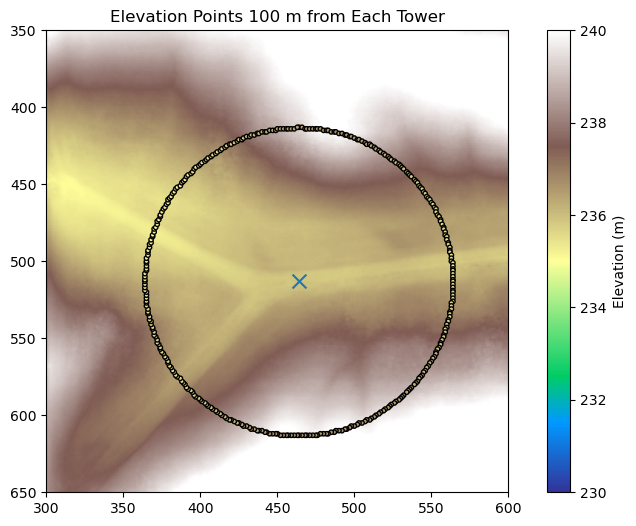

In [9]:
# Plot elevation points for each tower at 100 m distance
plt.figure(figsize=(10, 6))
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    plt.imshow(elevation, cmap='terrain', vmin=230, vmax=240)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        plt.scatter(col, row, label=data['label'], marker='x', s=100)
    # use the same color bar as the elevation map
    for tower_key in towers.keys():
        tower_points = elevation_points[elevation_points['tower'] == tower_key]
        plt.scatter(tower_points['col'], tower_points['row'], c=tower_points['elevation'], label=towers[tower_key]['label'], s=10, cmap='terrain', vmin=220, vmax=250, edgecolors='black')
    # add colorbar for elevation points
    
    plt.xlim(300, 600)
    plt.ylim(650, 350)
    # plt.legend()
    plt.title('Elevation Points 100 m from Each Tower')
    # plt.tight_layout()
    plt.show()

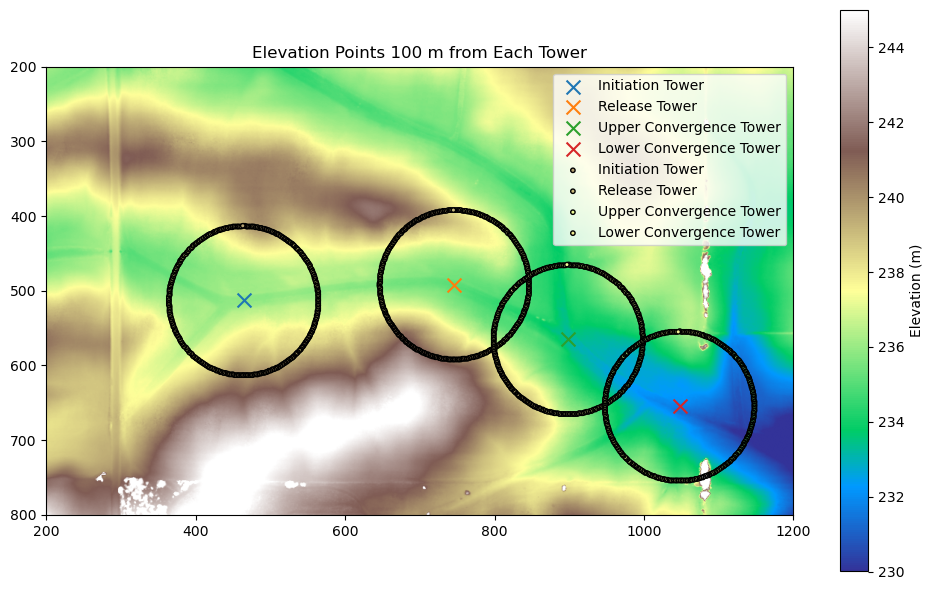

In [10]:
# Plot elevation points for each tower at 100 m distance
plt.figure(figsize=(10, 6))
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    plt.imshow(elevation, cmap='terrain', vmin=230, vmax=245)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        plt.scatter(col, row, label=data['label'], marker='x', s=100)
    # use the same color bar as the elevation map
    for tower_key in towers.keys():
        tower_points = elevation_points[elevation_points['tower'] == tower_key]
        plt.scatter(tower_points['col'], tower_points['row'], c=tower_points['elevation'], label=towers[tower_key]['label'], s=10, cmap='terrain', vmin=220, vmax=250, edgecolors='black')
    # add colorbar for elevation points
    
    plt.xlim(200, 1200)
    plt.ylim(800, 200)
    plt.legend()
    plt.title('Elevation Points 100 m from Each Tower')
    plt.tight_layout()
    plt.show()

In [11]:
elevation_points[elevation_points['distance']==100]

,tower,distance,bearing,row,col,elevation,delta_elevation
0,init,100,0,413,464,239.314774,3.410156
1,init,100,1,413,466,239.431839,3.527222
2,init,100,2,414,468,239.515533,3.610916
3,init,100,3,414,469,239.497940,3.593323
4,init,100,4,414,471,239.628769,3.724152
...,...,...,...,...,...,...,...
1435,lconv,100,355,555,1039,235.560974,3.819397
1436,lconv,100,356,555,1041,235.635803,3.894226
1437,lconv,100,357,555,1043,235.701340,3.959763
1438,lconv,100,358,555,1044,235.722397,3.980820


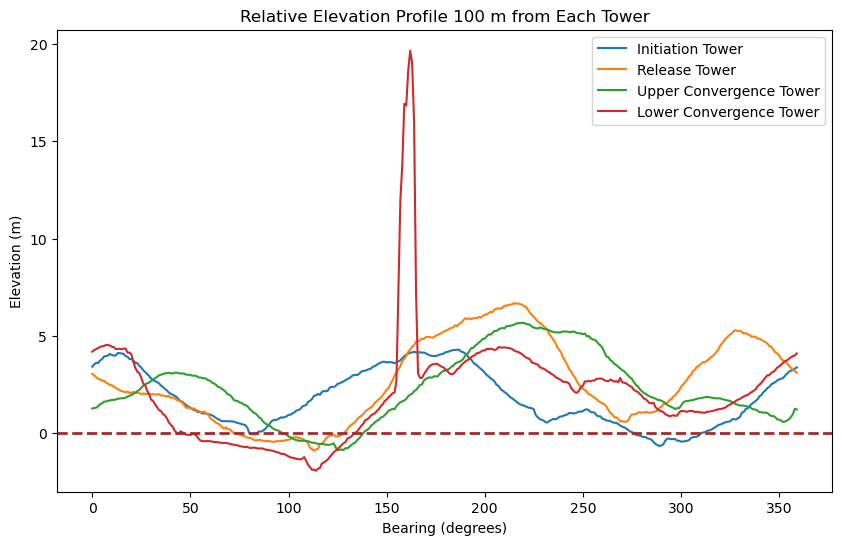

In [12]:

elevation_points_100 = elevation_points[elevation_points['distance']==100]

plt.figure(figsize=(10, 6))
for tower_key in towers.keys():
     tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
     plt.plot(tower_points['bearing'], tower_points['delta_elevation'], label=towers[tower_key]['label'])
plt.xlabel('Bearing (degrees)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.title('Relative Elevation Profile 100 m from Each Tower')

plt.axhline(y=0, color='brown', linestyle='--', linewidth=2, label='Equal Elevation')

plt.show()

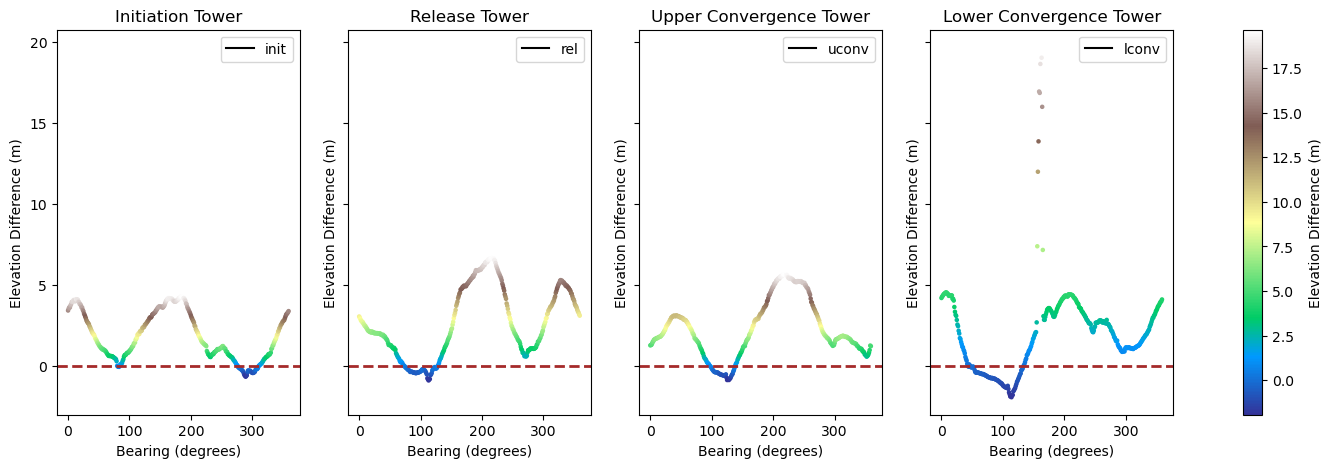

In [13]:
# Create a figure and axes with shared x and y axes
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, tower_key in zip(axes, towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['delta_elevation'],
                    s=5, c=tower_points['delta_elevation'], cmap='terrain')
    
    ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Bearing (degrees)')
    ax.set_ylabel('Elevation Difference (m)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    ax.plot([], [], label=tower_key, color='black')
    ax.legend()
    
# Add a colorbar to the figure
# This is a critical step to explain the color mapping
fig.colorbar(sc, ax=axes, orientation='vertical', label='Elevation Difference (m)')

# Adjust layout
# fig.tight_layout()

plt.show()

In [14]:
towers['init']

{'name': 'init',
 'label': 'Initiation Tower',
 'lat_lon_str': '40°12′41.4576′′N,88°24′37.98′′W',
 'lat_lon': [40.211516, -88.41055],
 'x_y': [293426.78451102215, 393488.8263018386],
 'elvation': np.float32(235.90462)}

In [15]:
# Load inversion and SR data
invdf=pd.read_pickle("data/inversions/inversiontimeswithwinds.pkl")
SR=pd.read_pickle("data/SRAll.pkl")
print("inversion data loaded")

inversion data loaded


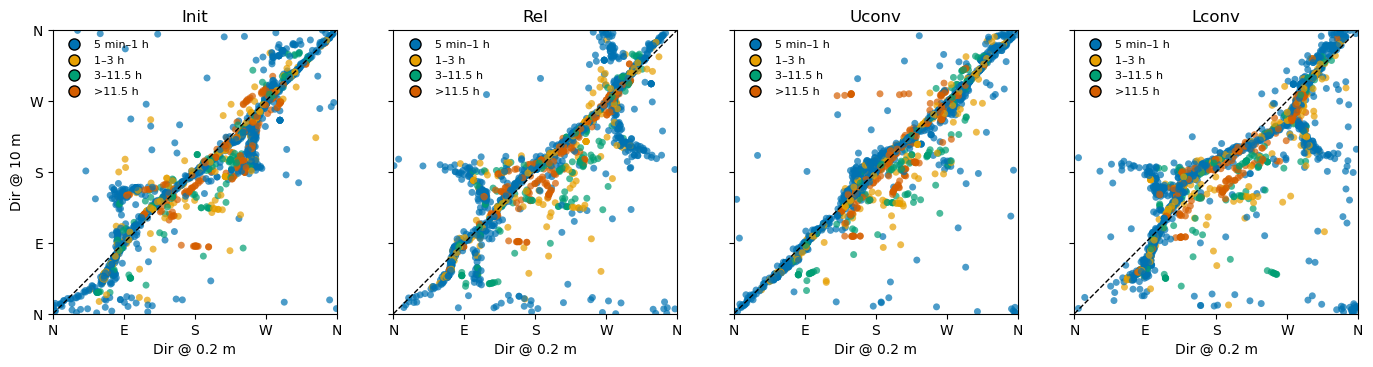

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Tower configs
tower_vars = {
    "Init":  {"dir_low": "Dir_0_2m_init",  "dir_high": "dir_10m_init"},
    "Rel":   {"dir_low": "Dir_0_2m_rel",   "dir_high": "dir_10m_rel"},
    "Uconv": {"dir_low": "Dir_0_2m_uconv", "dir_high": "dir_10m_uconv"},
    "Lconv": {"dir_low": "Dir_0_2m_lconv", "dir_high": "dir_10m_lconv"},
}

# Duration bins (hours)
bins = [0, 1, 3, 11.5, np.inf]
labels = ["5 min–1 h", "1–3 h", "3–11.5 h", ">11.5 h"]

# Color-blind–friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

# Cardinal ticks
cardinal_ticks = [0, 90, 180, 270, 360]
cardinal_labels = ["N", "E", "S", "W", "N"]

fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, (tower, cols) in zip(axes, tower_vars.items()):
    dir_low  = invdf[cols["dir_low"]]
    dir_high = invdf[cols["dir_high"]]
    duration = invdf["Duration (min)"]/60

    mask = dir_low.notna() & dir_high.notna() & duration.notna()
    dir_low  = dir_low[mask]
    dir_high = dir_high[mask]
    duration = duration[mask]

    sc = ax.scatter(
        dir_low, dir_high,
        c=duration, cmap=cmap, norm=norm,
        s=25, alpha=0.7, edgecolor="none"
    )

    ax.set_xlim(0, 360)
    ax.set_ylim(0, 360)
    ax.set_aspect("equal")
    ax.set_title(tower)

    # Cardinal ticks
    ax.set_xticks(cardinal_ticks)
    ax.set_xticklabels(cardinal_labels)
    ax.set_yticks(cardinal_ticks)
    ax.set_yticklabels(cardinal_labels)

    ax.set_xlabel("Dir @ 0.2 m")
    if ax is axes[0]:
        ax.set_ylabel("Dir @ 10 m")

    # 1:1 line with label
    ax.plot([0, 360], [0, 360], color="black", linestyle="--",
            linewidth=1, label="Aligned winds")
    #ax.legend(loc="lower right", fontsize=8, frameon=False)

    # 🔑 Create a custom legend for duration bins
    handles = []
    for color, label in zip(colors, labels):
        handles.append(
            plt.Line2D([], [], marker="o", color="none",
                       markerfacecolor=color, markersize=8, label=label)
        )

    ax.legend(handles=handles, loc="upper left", fontsize=8, frameon=False)

plt.subplots_adjust(right=0.85)
plt.show()

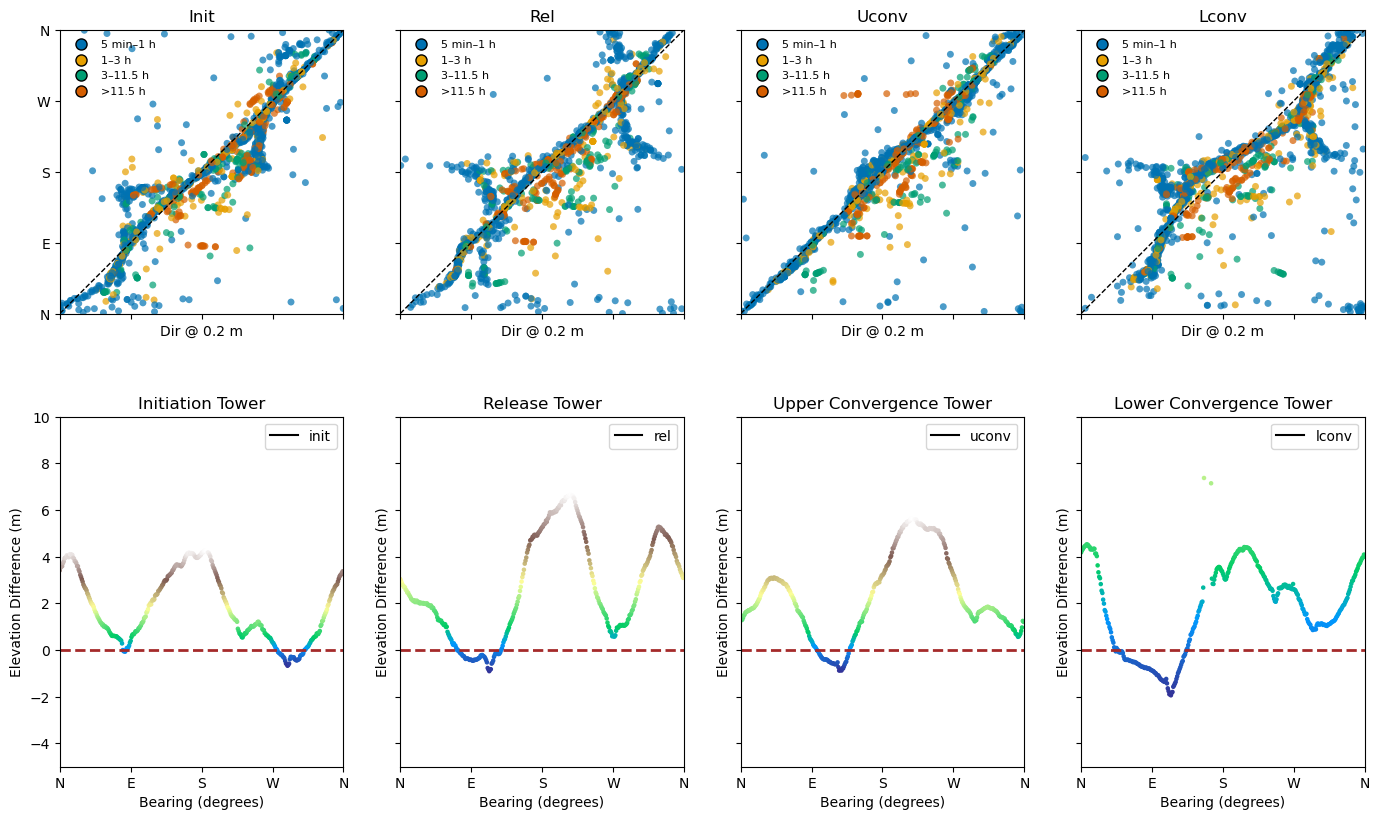

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm


# Tower configs
tower_vars = {
    "Init":  {"dir_low": "Dir_0_2m_init",  "dir_high": "dir_10m_init"},
    "Rel":   {"dir_low": "Dir_0_2m_rel",   "dir_high": "dir_10m_rel"},
    "Uconv": {"dir_low": "Dir_0_2m_uconv", "dir_high": "dir_10m_uconv"},
    "Lconv": {"dir_low": "Dir_0_2m_lconv", "dir_high": "dir_10m_lconv"},
}

# Duration bins (hours)
bins = [0, 1, 3, 11.5, np.inf]
labels = ["5 min–1 h", "1–3 h", "3–11.5 h", ">11.5 h"]

# Color-blind–friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

# Cardinal ticks
cardinal_ticks = [0, 90, 180, 270, 360]
cardinal_labels = ["N", "E", "S", "W", "N"]


# plot two rows of subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex='col', sharey='row')
# fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, (tower, cols) in zip(axes[0], tower_vars.items()):
    
    dir_low  = invdf[cols["dir_low"]]
    dir_high = invdf[cols["dir_high"]]
    duration = invdf["Duration (min)"]/60

    mask = dir_low.notna() & dir_high.notna() & duration.notna()
    dir_low  = dir_low[mask]
    dir_high = dir_high[mask]
    duration = duration[mask]

    sc = ax.scatter(
        dir_low, dir_high,
        c=duration, cmap=cmap, norm=norm,
        s=25, alpha=0.7, edgecolor="none"
    )

    ax.set_xlim(0, 360)
    ax.set_ylim(0, 360)
    ax.set_aspect("equal")
    ax.set_title(tower)

    # Cardinal ticks
    ax.set_xticks(cardinal_ticks)
    ax.set_xticklabels(cardinal_labels)
    ax.set_yticks(cardinal_ticks)
    ax.set_yticklabels(cardinal_labels)

    ax.set_xlabel("Dir @ 0.2 m")
    if ax is axes[0]:
        ax.set_ylabel("Dir @ 10 m")

    # 1:1 line with label
    ax.plot([0, 360], [0, 360], color="black", linestyle="--",
            linewidth=1, label="Aligned winds")
    #ax.legend(loc="lower right", fontsize=8, frameon=False)

    # 🔑 Create a custom legend for duration bins
    handles = []
    for color, label in zip(colors, labels):
        handles.append(
            plt.Line2D([], [], marker="o", color="none",
                       markerfacecolor=color, markersize=8, label=label)
        )

    ax.legend(handles=handles, loc="upper left", fontsize=8, frameon=False)

for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['delta_elevation'],
                    s=5, c=tower_points['delta_elevation'], cmap='terrain')
    
    ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Bearing (degrees)')
    ax.set_ylabel('Elevation Difference (m)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    ax.plot([], [], label=tower_key, color='black')
    ax.legend()

for ax in axes[1]:
    ax.set_ylim(-5, 10)
    
# Add a colorbar to the figure
# This is a critical step to explain the color mapping
# fig.colorbar(sc, ax=axes, orientation='vertical', label='Elevation Difference (m)')

plt.subplots_adjust(right=0.85)
plt.show()

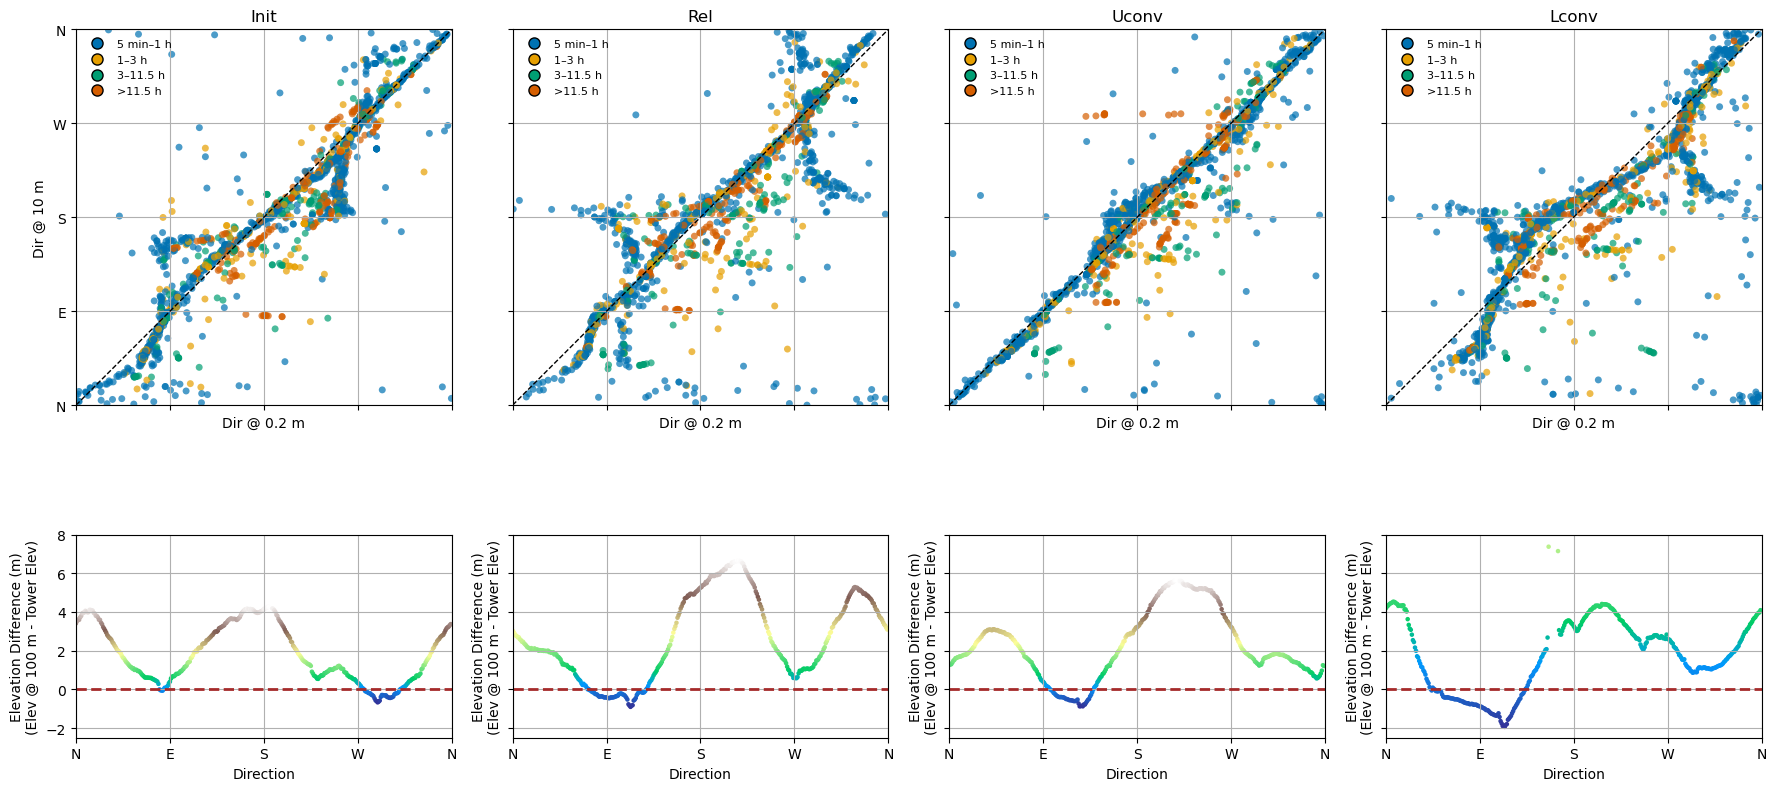

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

# Tower configs
tower_vars = {
    "Init":  {"dir_low": "Dir_0_2m_init",  "dir_high": "dir_10m_init"},
    "Rel":   {"dir_low": "Dir_0_2m_rel",   "dir_high": "dir_10m_rel"},
    "Uconv": {"dir_low": "Dir_0_2m_uconv", "dir_high": "dir_10m_uconv"},
    "Lconv": {"dir_low": "Dir_0_2m_lconv", "dir_high": "dir_10m_lconv"},
}

# Duration bins (hours)
bins = [0, 1, 3, 11.5, np.inf]
labels = ["5 min–1 h", "1–3 h", "3–11.5 h", ">11.5 h"]

# Color-blind–friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

# Cardinal ticks
cardinal_ticks = [0, 90, 180, 270, 360]
cardinal_labels = ["N", "E", "S", "W", "N"]

# plot two rows of subplots
# Use the gridspec_kw argument to specify the height ratio of the rows
# The first row is twice as tall as the second row in this example.
fig, axes = plt.subplots(
    2, 4, figsize=(18, 10), sharex='col', sharey='row',
    gridspec_kw={'height_ratios': [1, 0.25]}
)

# Top row of subplots
for ax, (tower, cols) in zip(axes[0], tower_vars.items()):
    dir_low  = invdf[cols["dir_low"]]
    dir_high = invdf[cols["dir_high"]]
    duration = invdf["Duration (min)"]/60

    mask = dir_low.notna() & dir_high.notna() & duration.notna()
    dir_low  = dir_low[mask]
    dir_high = dir_high[mask]
    duration = duration[mask]

    sc_top = ax.scatter(
        dir_low, dir_high,
        c=duration, cmap=cmap, norm=norm,
        s=25, alpha=0.7, edgecolor="none"
    )

    ax.set_xlim(0, 360)
    ax.set_ylim(0, 360)
    ax.set_aspect("equal")
    ax.set_title(tower)

    # Cardinal ticks
    ax.set_xticks(cardinal_ticks)
    ax.set_xticklabels(cardinal_labels)
    ax.set_yticks(cardinal_ticks)
    ax.set_yticklabels(cardinal_labels)

    ax.set_xlabel("Dir @ 0.2 m")
    if ax is axes[0][0]:
        ax.set_ylabel("Dir @ 10 m")

    # 1:1 line with label
    ax.plot([0, 360], [0, 360], color="black", linestyle="--",
            linewidth=1, label="Aligned winds")
    
    # 🔑 Create a custom legend for duration bins
    handles = []
    for color, label in zip(colors, labels):
        handles.append(
            plt.Line2D([], [], marker="o", color="none",
                       markerfacecolor=color, markersize=8, label=label)
        )
    ax.legend(handles=handles, loc="upper left", fontsize=8, frameon=False)
    ax.grid(True)

# Bottom row of subplots
for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc_bottom = ax.scatter(tower_points['bearing'], tower_points['delta_elevation'],
                    s=5, c=tower_points['delta_elevation'], cmap='terrain')
    
    # ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Direction')
    ax.set_ylabel('Elevation Difference (m)\n(Elev @ 100 m - Tower Elev)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    ax.grid(True)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    # ax.plot([], [], label=tower_key, color='black')
    # ax.legend()
for ax in axes[1]:
    ax.set_ylim(-2.5, 8)
# for ax in axes:
#     ax.grid(True)
# plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.show()

In [19]:
# The 'errors' parameter will coerce any non-numeric values into NaN
elevation_points['delta_elevation'] = pd.to_numeric(elevation_points['delta_elevation'], errors='coerce')
elevation_points['distance'] = pd.to_numeric(elevation_points['distance'], errors='coerce')

# 2. Drop rows with NaN values
# This will remove any rows where the conversion failed
elevation_points.dropna(subset=['delta_elevation', 'distance'], inplace=True)

In [20]:
elevation_points['slope_degrees'] = np.degrees(np.arctan(elevation_points['delta_elevation']/elevation_points['distance']))

In [21]:
elevation_points.describe()

,distance,elevation,delta_elevation,slope_degrees
count,1440.0,1440.000000,1440.000000,1440.000000
mean,100.0,236.190674,2.201762,1.260371
std,0.0,2.699605,2.165127,1.236194
min,100.0,229.801895,-1.939682,-1.111217
25%,100.0,234.616539,0.740662,0.424360
50%,100.0,236.098160,1.933380,1.107607
75%,100.0,238.047302,3.544342,2.029909
max,100.0,251.397186,19.655609,11.120075


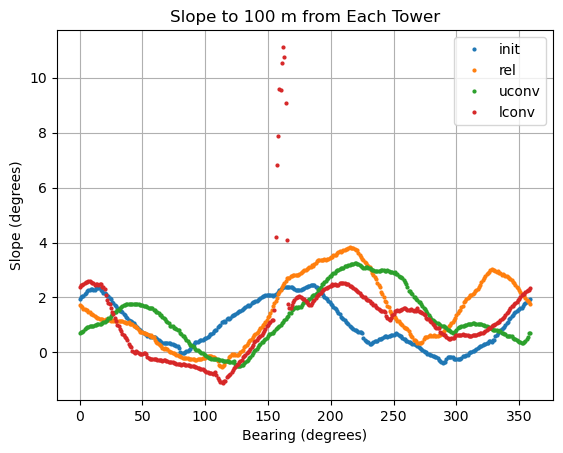

In [22]:

for tower in towers.keys():
    tower_points = elevation_points[elevation_points['tower'] == tower]
    plt.plot(tower_points['bearing'], tower_points['slope_degrees'], 'o', markersize=2, label=tower)
plt.legend()
plt.xlabel('Bearing (degrees)') 
plt.ylabel('Slope (degrees)')
plt.title('Slope to 100 m from Each Tower')
plt.grid(True)
plt.show()

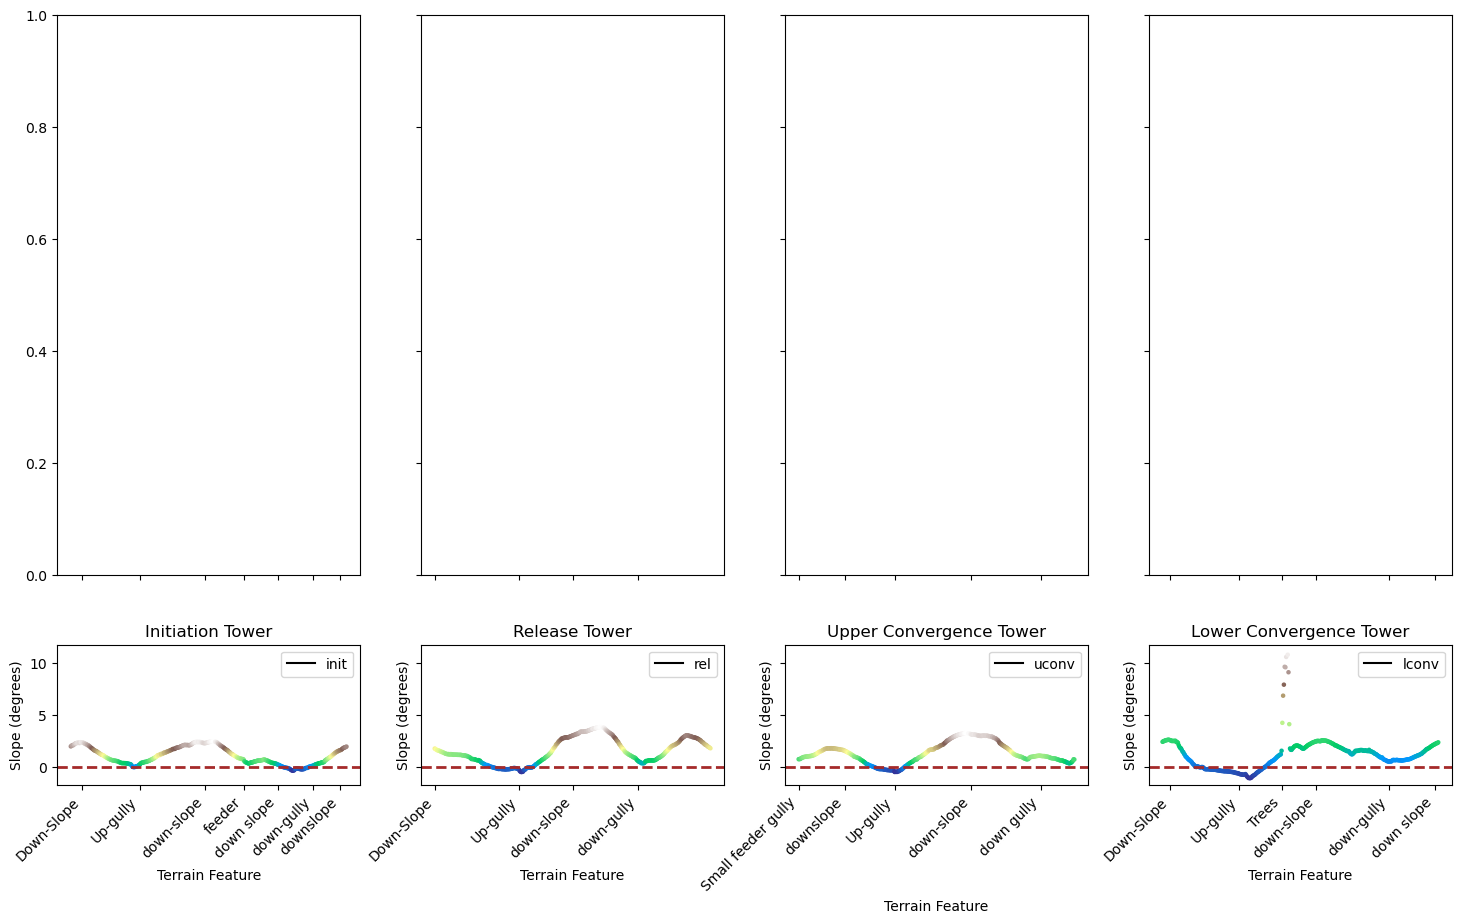

In [23]:
# Creating a dictionary for cardinal ticks and labels for each tower based on eyeballing the plots
tower_dir_labels = {
    "init": {
        "cardinal_ticks": [15, 90, 175, 225, 270, 315, 350],
        "cardinal_labels": ["Down-Slope", "Up-gully", "down-slope", "feeder", "down slope", "down-gully", "downslope"]
    },
    "rel": {
        "cardinal_ticks": [0, 110, 180, 265],
        "cardinal_labels": ["Down-Slope", "Up-gully", "down-slope", "down-gully"]
    },
    "uconv": {
        "cardinal_ticks": [0, 60, 125, 225, 315],
        "cardinal_labels": ["Small feeder gully", "downslope", "Up-gully", "down-slope", "down gully"]
    },
    "lconv": {
        "cardinal_ticks": [10, 100, 155, 200, 295, 355],
        "cardinal_labels": ["Down-Slope", "Up-gully", "Trees", "down-slope", "down-gully", "down slope"]
    }
}
fig, axes = plt.subplots(
    2, 4, figsize=(18, 10), sharex='col', sharey='row',
    gridspec_kw={'height_ratios': [1, 0.25]}
)

for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points[elevation_points['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['slope_degrees'],
                    s=5, c=tower_points['slope_degrees'], cmap='terrain')
    
    ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Terrain Feature')
    ax.set_ylabel('Slope (degrees)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    ax.plot([], [], label=tower_key, color='black')
    ax.legend()
    
    # Set custom cardinal ticks and labels
    if tower_key in tower_dir_labels:
        ax.set_xticks(tower_dir_labels[tower_key]['cardinal_ticks'])
        ax.set_xticklabels(tower_dir_labels[tower_key]['cardinal_labels'], rotation=45, ha='right')
plt.show()

In [24]:
conditions = [
    (elevation_points['slope_degrees'] < 0),
    (elevation_points['slope_degrees'] > 1),
    (elevation_points['slope_degrees'] >= 0) & (elevation_points['slope_degrees'] <= 1)
]

choices = [
    'down-gully',
    'up slope',
    'up-gully'
]

# Use np.select to create the new 'terrain_feature' column
elevation_points['terrain_feature'] = np.select(conditions, choices, default='unknown')
elevation_points.head(10)

,tower,distance,bearing,row,col,elevation,delta_elevation,slope_degrees,terrain_feature
0,init,100,0,413,464,239.314774,3.410156,1.953119,up slope
1,init,100,1,413,466,239.431839,3.527222,2.020112,up slope
2,init,100,2,414,468,239.515533,3.610916,2.068004,up slope
3,init,100,3,414,469,239.497940,3.593323,2.057937,up slope
4,init,100,4,414,471,239.628769,3.724152,2.132796,up slope
5,init,100,5,414,473,239.703293,3.798676,2.175435,up slope
6,init,100,6,414,475,239.835312,3.930695,2.250963,up slope
7,init,100,7,414,476,239.862122,3.957504,2.266300,up slope
8,init,100,8,414,478,239.881088,3.976471,2.277150,up slope
9,init,100,9,415,480,239.965500,4.060883,2.325437,up slope


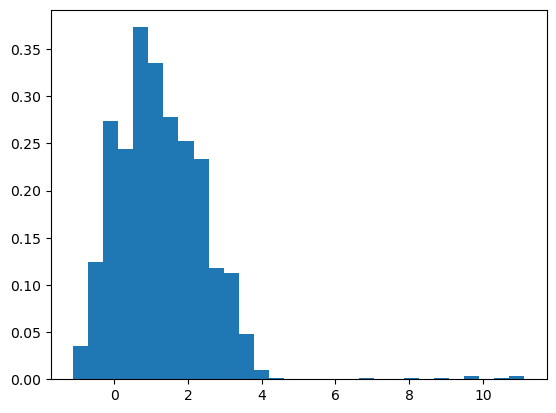

In [25]:
plt.hist(elevation_points['slope_degrees'], density=True, bins=30)
plt.show()

# Now looking at inversions with terrain

In [26]:
invdf.head()

,Inversion Start,Inversion End,Duration (min),Strength,Max in period,Min in period,Inv Class,Inv location,Lapse rate,harvest status,...,v_v__3m_uconv,v_v__a2_1_5m_uconv,v_v__6m_uconv,v_v__4_5m_uconv,v_v__1_5m_lconv,v_v__10m_uconv,Timestamp,onsethour,month,day
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-28 23:52:30,2018-09-28 23:52:30,2018-09-28 23:52:30,5.0,0.001105,0.001105,0.001105,micro,Lcon_deep,0.000158,pre-harvest,...,0.640833,0.662271,0.727278,0.643862,0.894026,0.917303,2018-09-28 23:52:30,23,9,28
2018-09-29 00:02:30,2018-09-29 00:02:30,2018-09-29 00:02:30,5.0,0.001326,0.001326,0.001326,micro,Lcon_deep,0.000189,pre-harvest,...,1.037336,0.672173,0.925123,0.986202,0.719199,0.854310,2018-09-29 00:02:30,0,9,29
2018-09-29 00:12:30,2018-09-29 00:12:30,2018-09-29 00:57:30,45.0,0.023399,0.037335,0.006511,short,Lcon_deep,0.003343,pre-harvest,...,0.393645,0.317861,0.482644,0.429920,0.384464,0.590932,2018-09-29 00:12:30,0,9,29
2018-09-29 01:07:30,2018-09-29 01:07:30,2018-09-29 01:07:30,5.0,0.014698,0.014698,0.014698,micro,Lcon_deep,0.002100,pre-harvest,...,0.252155,0.263163,0.387183,0.314718,0.306852,0.515228,2018-09-29 01:07:30,1,9,29
2018-09-29 01:27:30,2018-09-29 01:27:30,2018-09-29 02:27:30,60.0,0.063455,0.127482,0.014619,short,Lcon_deep,0.009065,pre-harvest,...,0.145628,0.112382,0.176907,0.159337,0.144246,0.223360,2018-09-29 01:27:30,1,9,29


In [27]:
print([col for col in invdf.columns])

['Inversion Start', 'Inversion End', 'Duration (min)', 'Strength', 'Max in period', 'Min in period', 'Inv Class', 'Inv location', 'Lapse rate', 'harvest status', 'spd_15m_lconv', 'spd_4_5m_uconv', 'spd_6m_init', 'spd_4_5m_rel', 'spd_a2_1_5m_uconv', 'spd_10m_init', 'spd_10m_rel', 'spd_1_5m_init', 'spd_6m_uconv', 'spd_3m_rel', 'spd_a2_1_5m_lconv', 'spd_4_5m_init', 'spd_20m_lconv', 'spd_6m_rel', 'spd_1_5m_uconv', 'spd_6m_lconv', 'Spd_0_2m_uconv', 'spd_10m_lconv', 'spd_15m_rel', 'spd_a2_1_5m_rel', 'spd_4_5m_lconv', 'spd_3m_lconv', 'spd_1_5m_rel', 'spd_a1_1_5m_lconv', 'spd_3m_uconv', 'Spd_0_2m_rel', 'spd_a1_1_5m_uconv', 'spd_20m_rel', 'spd_8_5m_rel', 'spd_3m_init', 'spd_8_5m_lconv', 'Spd_0_2m_init', 'Spd_0_2m_lconv', 'spd_a1_1_5m_rel', 'spd_1_5m_lconv', 'spd_10m_uconv', 'dir_15m_lconv', 'dir_4_5m_uconv', 'dir_6m_init', 'dir_4_5m_rel', 'dir_a2_1_5m_uconv', 'dir_10m_init', 'dir_10m_rel', 'dir_1_5m_init', 'dir_6m_uconv', 'dir_3m_rel', 'dir_a2_1_5m_lconv', 'dir_4_5m_init', 'dir_20m_lconv', 'dir

In [28]:
print(invdf['Inv location'].unique())


['Lcon_deep' 'Lcon_grnd' 'Lcon_shal' 'Ucon_deep' 'Ucon_grnd' 'Rel__grnd'
 'Ucon_shal' 'Rel__deep' 'Rel__shal' 'Init_deep' 'Init_grnd' 'Init_shal']


In [29]:
init_invdf = invdf[invdf['Inv location'].str.lower().str.contains('init')]
init_invdf

,Inversion Start,Inversion End,Duration (min),Strength,Max in period,Min in period,Inv Class,Inv location,Lapse rate,harvest status,...,v_v__3m_uconv,v_v__a2_1_5m_uconv,v_v__6m_uconv,v_v__4_5m_uconv,v_v__1_5m_lconv,v_v__10m_uconv,Timestamp,onsethour,month,day
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-27 22:47:30,2018-09-27 22:47:30,2018-09-28 13:07:30,860.0,0.601698,5.176610,0.003171,extreme,Init_deep,0.070788,pre-harvest,...,0.110495,0.083129,0.167548,0.153817,0.076564,0.198120,2018-09-27 22:47:30,22,9,27
2018-09-28 23:07:30,2018-09-28 23:07:30,2018-09-29 10:07:30,660.0,0.144737,0.417719,0.014194,long,Init_deep,0.017028,pre-harvest,...,0.237808,0.195320,0.285668,0.264960,0.221304,0.325855,2018-09-28 23:07:30,23,9,28
2018-09-29 20:47:30,2018-09-29 20:47:30,2018-09-29 22:32:30,105.0,0.042874,0.091073,0.013812,medium,Init_deep,0.005044,pre-harvest,...,0.200885,0.229746,0.253991,0.303206,0.230799,0.333250,2018-09-29 20:47:30,20,9,29
2018-09-29 23:22:30,2018-09-29 23:22:30,2018-09-30 12:27:30,785.0,0.172813,0.627708,0.033008,extreme,Init_deep,0.020331,pre-harvest,...,0.116853,0.093244,0.129832,0.118859,0.077133,0.160285,2018-09-29 23:22:30,23,9,29
2018-09-30 20:32:30,2018-09-30 20:32:30,2018-09-30 20:32:30,5.0,0.003424,0.003424,0.003424,micro,Init_deep,0.000403,pre-harvest,...,0.428509,0.409037,0.609394,0.580570,0.304258,0.634251,2018-09-30 20:32:30,20,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-16 00:42:30,2018-11-16 00:42:30,2018-11-16 14:12:30,810.0,0.128578,0.397819,0.009161,extreme,Init_shal,0.042859,post-harvest,...,0.400710,0.380362,0.457951,0.454926,0.391426,0.480916,2018-11-16 00:42:30,0,11,16
2018-11-16 14:52:30,2018-11-16 14:52:30,2018-11-16 19:52:30,300.0,0.083082,0.141290,0.024749,long,Init_shal,0.027694,post-harvest,...,0.404517,0.438657,0.416161,0.409188,0.420624,0.390378,2018-11-16 14:52:30,14,11,16
2018-11-16 20:07:30,2018-11-16 20:07:30,2018-11-17 13:57:30,1070.0,0.214461,1.216811,0.016455,extreme,Init_shal,0.071487,post-harvest,...,0.121863,0.117142,0.146198,0.132277,0.102821,0.155338,2018-11-16 20:07:30,20,11,16


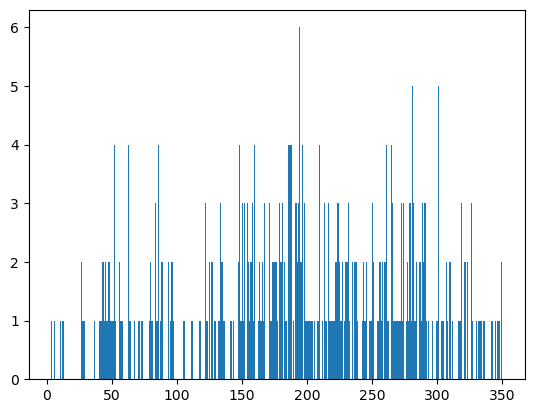

In [30]:
bins = np.arange(0, 361, 1)
plt.hist(invdf[invdf['Inv location'].str.lower().str.contains('init')]['dir_10m_init'], bins=360)
plt.show()


['micro', 'short', 'medium', 'extreme', 'long']


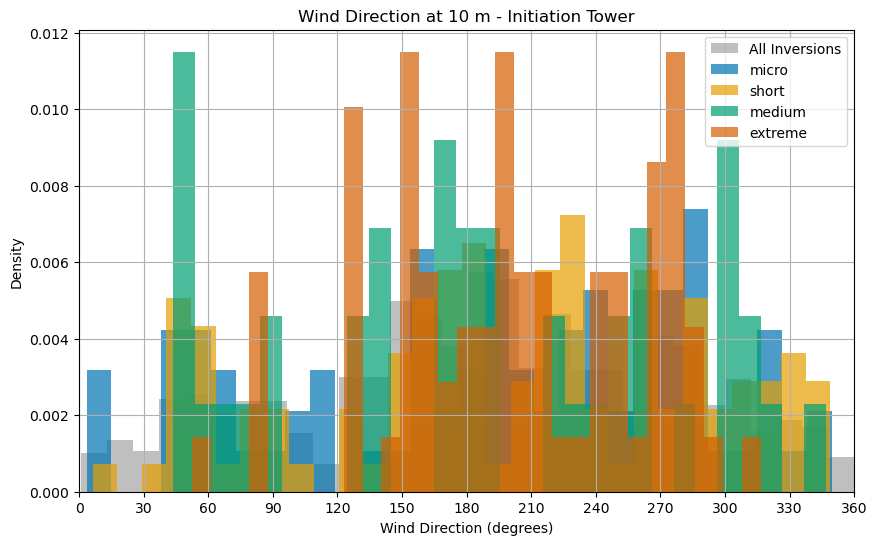

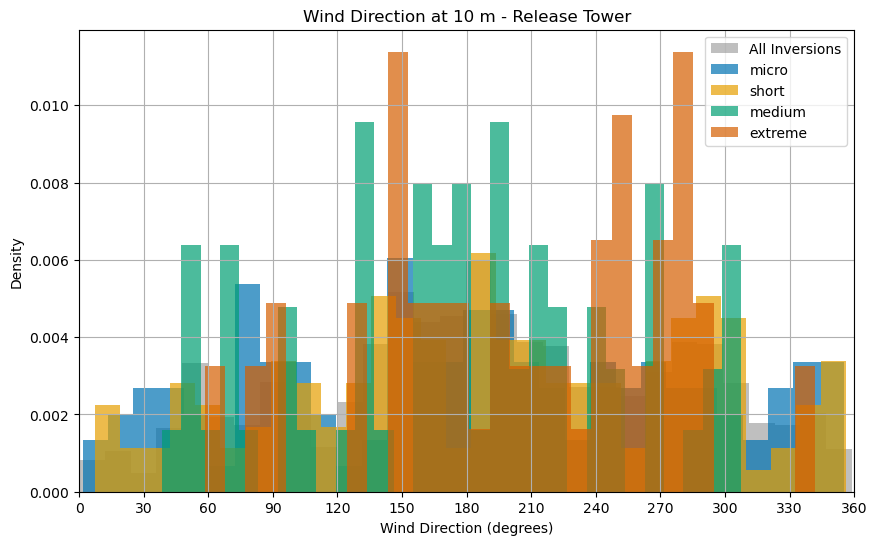

C:\Users\bmaro\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


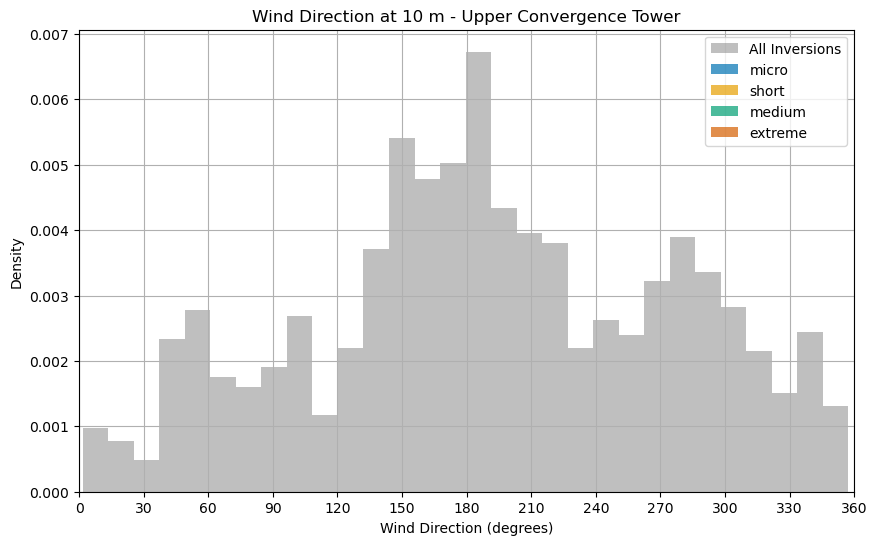

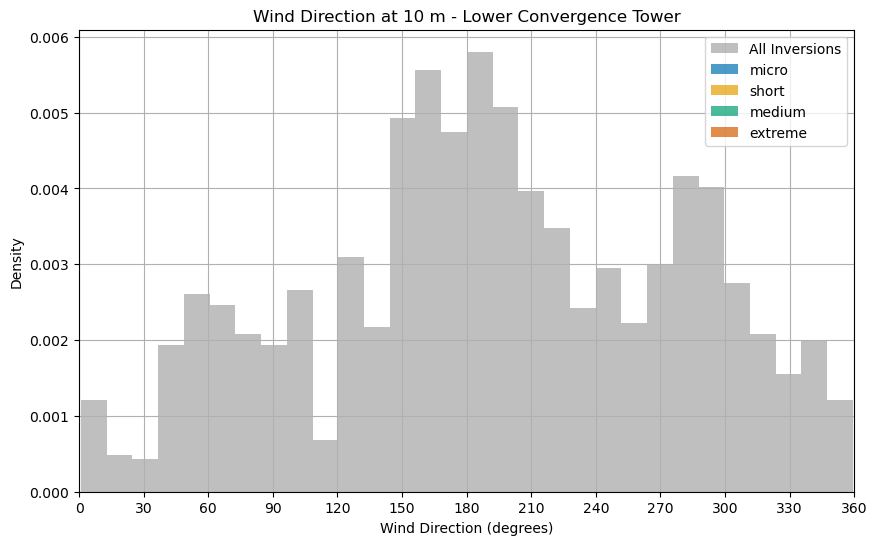

In [31]:
# Define the number of bins and colors for the distributions
n_bins = 30
colors = ["grey","#0072B2", "#E69F00", "#009E73", "#D55E00"]
labels = [class_name for class_name in invdf['Inv Class'].unique()]

print(labels)

# Plot the histograms
for tower in towers.keys():
    tower_key = tower.capitalize()
    dir_col = f"dir_10m_{tower.lower()}"
    
    plt.figure(figsize=(10, 6))
    
    # Plot the overall distribution in grey
    plt.hist(invdf[dir_col], bins=n_bins, color="grey", alpha=0.5, label='All Inversions', density=True, stacked=True)
    
    # Plot distributions for each inversion class
    for color, label in zip(colors[1:], labels):
        class_data = invdf[(invdf['Inv location'].str.lower().str.contains(tower.lower())) & (invdf['Inv Class'] == label)][dir_col]
        plt.hist(class_data, bins=n_bins, color=color, alpha=0.7, label=label, density=True)
    
    plt.title(f'Wind Direction at 10 m - {towers[tower]["label"]}')
    plt.xlabel('Wind Direction (degrees)')
    plt.ylabel('Density')
    plt.xticks(np.arange(0, 361, 30))
    plt.xlim(0, 360)
    plt.legend()
    plt.grid(True)
    plt.show()

init
dir_10m_init
rel
dir_10m_rel
uconv
dir_10m_uconv
lconv
dir_10m_lconv


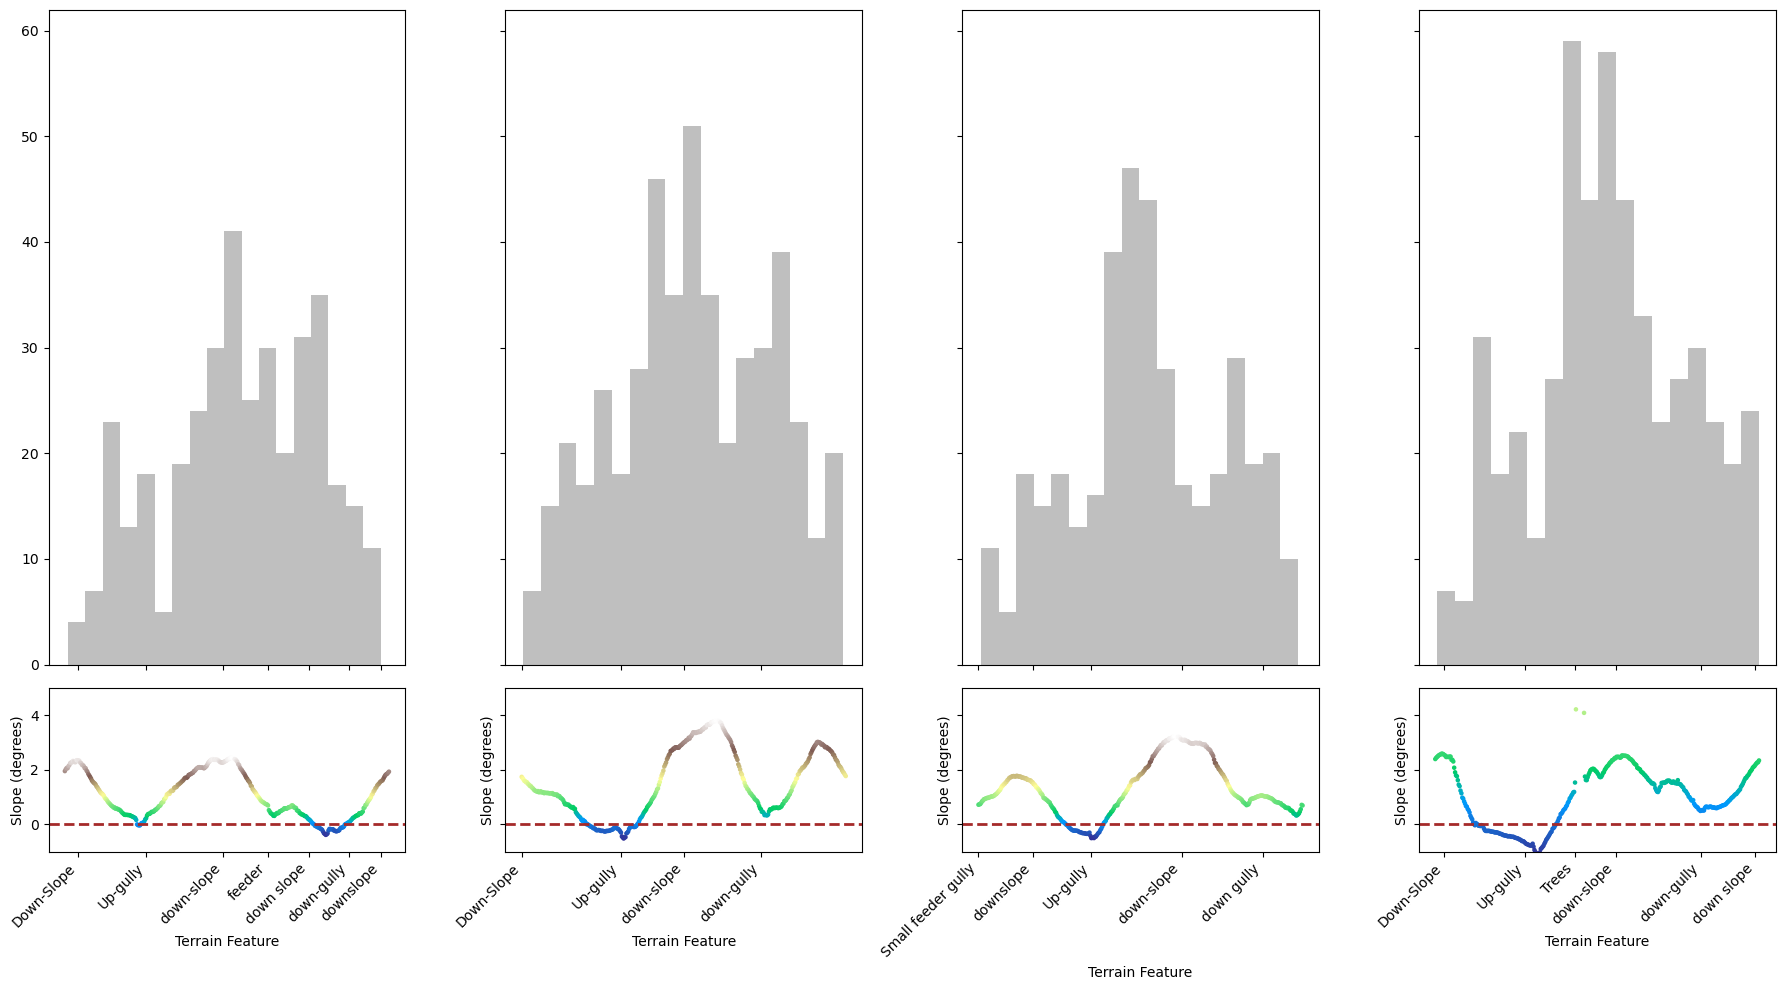

In [32]:
# for tower in towers plot a histogram of the 10m wind direction colored by inv class
# Creating a dictionary for cardinal ticks and labels for each tower based on eyeballing the plots
tower_dir_labels = {
    "init": {
        "cardinal_ticks": [15, 90, 175, 225, 270, 315, 350],
        "cardinal_labels": ["Down-Slope", "Up-gully", "down-slope", "feeder", "down slope", "down-gully", "downslope"]
    },
    "rel": {
        "cardinal_ticks": [0, 110, 180, 265],
        "cardinal_labels": ["Down-Slope", "Up-gully", "down-slope", "down-gully"]
    },
    "uconv": {
        "cardinal_ticks": [0, 60, 125, 225, 315],
        "cardinal_labels": ["Small feeder gully", "downslope", "Up-gully", "down-slope", "down gully"]
    },
    "lconv": {
        "cardinal_ticks": [10, 100, 155, 200, 295, 355],
        "cardinal_labels": ["Down-Slope", "Up-gully", "Trees", "down-slope", "down-gully", "down slope"]
    }
}
# plot two rows of subplots
# Use the gridspec_kw argument to specify the height ratio of the rows
fig, axes = plt.subplots(
    2, 4, figsize=(18, 10), sharex='col', sharey='row',
    gridspec_kw={'height_ratios': [1, 0.25]}
)

for ax, tower_key in zip(axes[0], towers.keys()):
    print(tower_key)
    dir_col = [col for col in invdf.columns if tower_key[:-1] in col.lower() and 'dir_10m' in col.lower()][0]
    print(dir_col)
    ax.hist(invdf[invdf['Inv location'].str.lower().str.contains(tower_key[:-1])][dir_col], bins=18, color='grey', alpha=0.5, label='All Inversions')
    

for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points[elevation_points['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['slope_degrees'],
                    s=5, c=tower_points['slope_degrees'], cmap='terrain')
    
    # ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Terrain Feature')
    ax.set_ylabel('Slope (degrees)')
    ax.set_ylim(-1, 5)
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    # ax.plot([], [], label=tower_key, color='black')
    # ax.legend()
    
    # Set custom cardinal ticks and labels
    if tower_key in tower_dir_labels:
        ax.set_xticks(tower_dir_labels[tower_key]['cardinal_ticks'])
        ax.set_xticklabels(tower_dir_labels[tower_key]['cardinal_labels'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

init
dir_10m_init
rel
dir_10m_rel
uconv
dir_10m_uconv
lconv
dir_10m_lconv


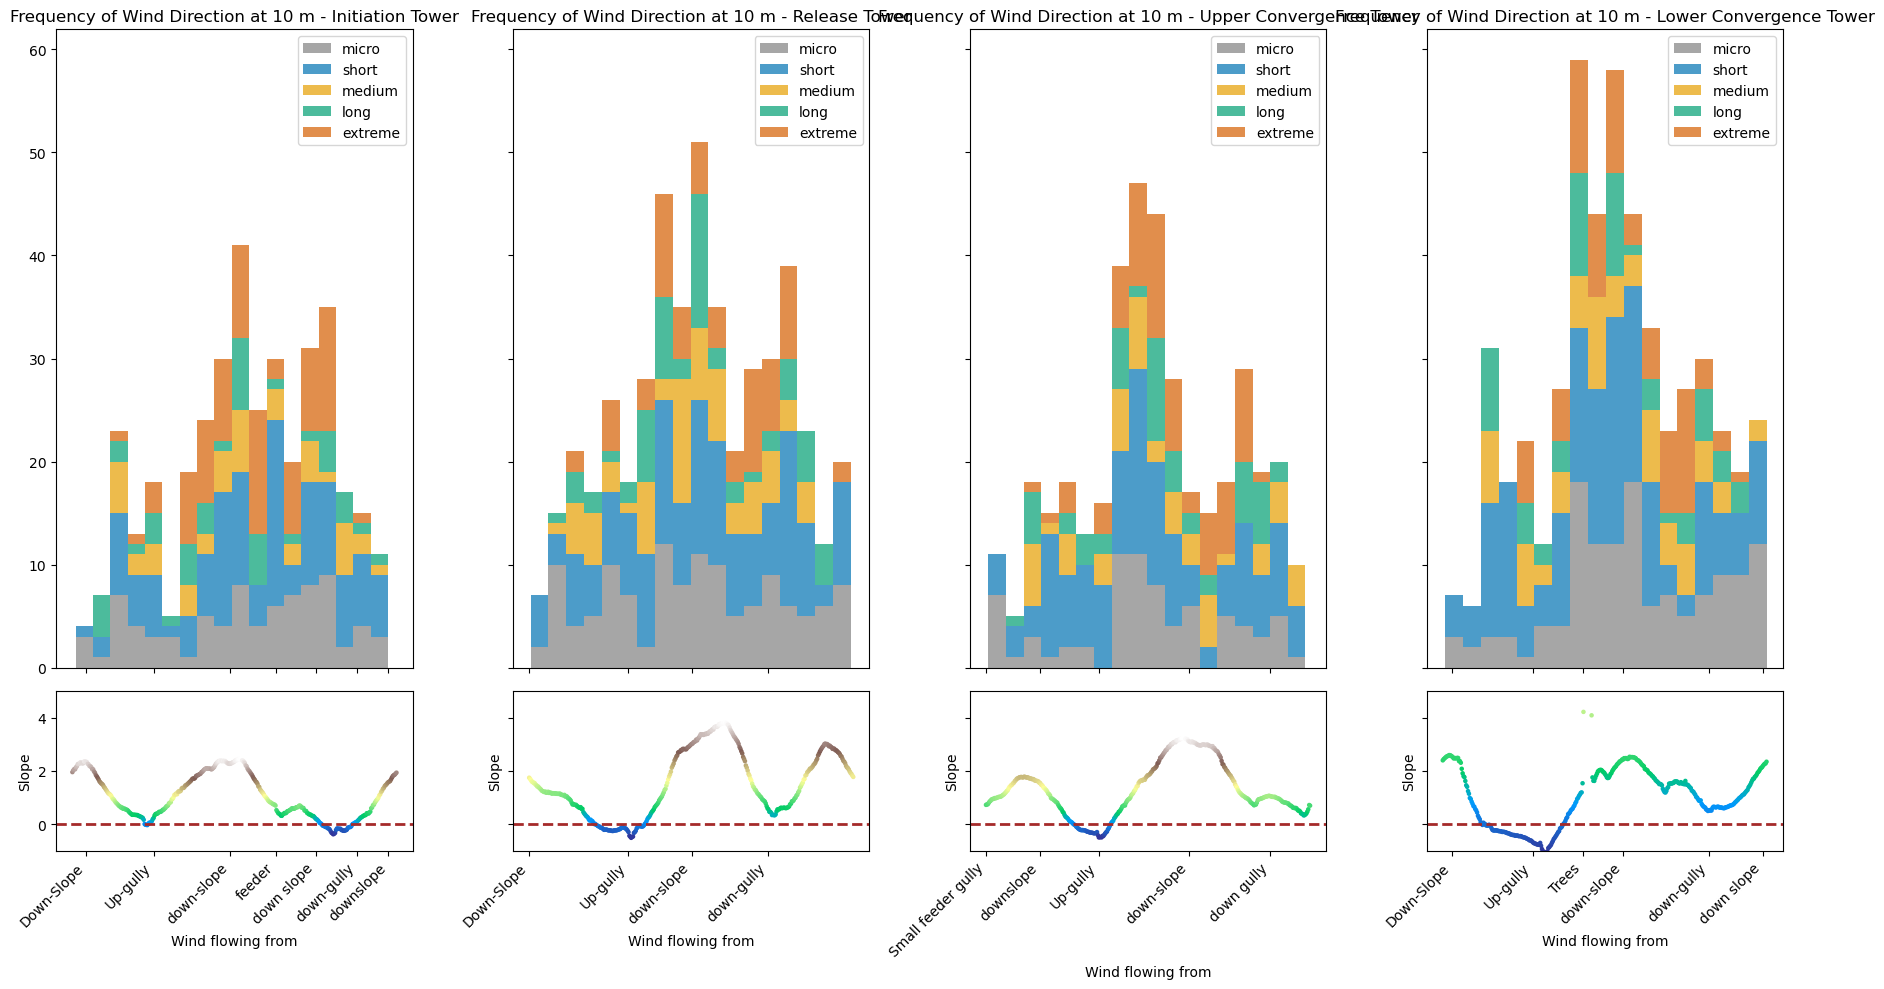

In [ ]:
inv_classes = ['micro', 'short', 'medium', 'long', 'extreme']

# plot two rows of subplots
# Use the gridspec_kw argument to specify the height ratio of the rows
fig, axes = plt.subplots(
    2, 4, figsize=(18, 10), sharex='col', sharey='row',
    gridspec_kw={'height_ratios': [1, 0.25]}
)

for ax, tower_key in zip(axes[0], towers.keys()):
    print(tower_key)
    dir_col = [col for col in invdf.columns if tower_key[:-1] in col.lower() and 'dir_10m' in col.lower()][0]
    print(dir_col)
    x = []
    for inv_class in inv_classes:
        x.append(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class)][dir_col])
        # ax.hist(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class)][dir_col]
        #         , histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_class)
    ax.hist(x, histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_classes, color=colors)
    ax.set_title(f'Frequency of Wind Direction at 10 m - {towers[tower_key]["label"]}')
    ax.legend()
    # ax.hist(invdf[invdf['Inv location'].str.lower().str.contains(tower_key[:-1])][dir_col], bins=18, color='grey', alpha=0.5, label='All Inversions')
    

for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points[elevation_points['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['slope_degrees'],
                    s=5, c=tower_points['slope_degrees'], cmap='terrain')
    
    # ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Wind flowing from')
    ax.set_ylabel('Slope')
    ax.set_ylim(-1, 5)
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    # ax.plot([], [], label=tower_key, color='black')
    # ax.legend()
    
    # Set custom cardinal ticks and labels
    if tower_key in tower_dir_labels:
        ax.set_xticks(tower_dir_labels[tower_key]['cardinal_ticks'])
        ax.set_xticklabels(tower_dir_labels[tower_key]['cardinal_labels'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

init
dir_10m_init
rel
dir_10m_rel
uconv
dir_10m_uconv
lconv
dir_10m_lconv


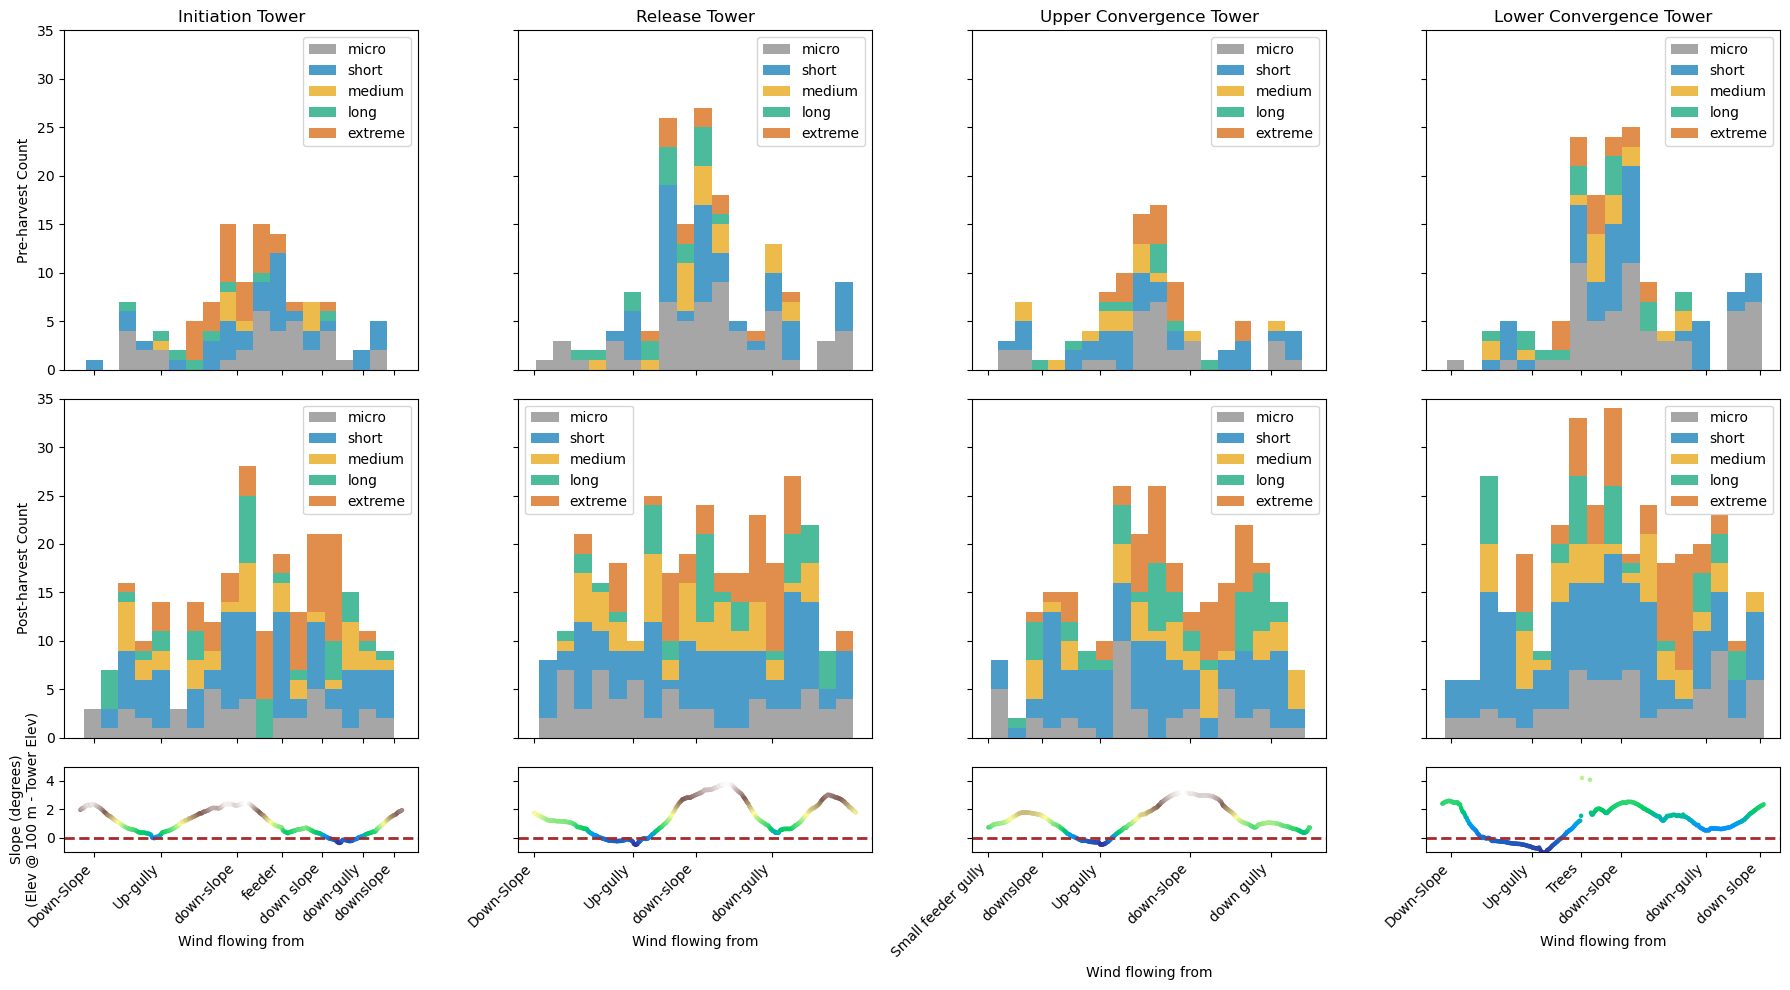

In [55]:
inv_classes = ['micro', 'short', 'medium', 'long', 'extreme']
y_count_min_max = [0, 35]

# plot two rows of subplots
# Use the gridspec_kw argument to specify the height ratio of the rows
fig, axes = plt.subplots(
    3, 4, figsize=(18, 10), sharex='col', sharey='row',    gridspec_kw={'height_ratios': [1, 1, 0.25]}
)

for ax, tower_key in zip(axes[0], towers.keys()):
    print(tower_key)
    dir_col = [col for col in invdf.columns if tower_key[:-1] in col.lower() and 'dir_10m' in col.lower()][0]
    print(dir_col)
    x = []
    for inv_class in inv_classes:
        x.append(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class) & (invdf['harvest status']=='pre-harvest')][dir_col])
        # ax.hist(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class)][dir_col]
        #         , histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_class)
    ax.hist(x, histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_classes, color=colors, density=False)
    ax.set_title(f'{towers[tower_key]["label"]}') # (f'Frequency of Wind Direction at 10 m - {towers[tower_key]["label"]}')
    ax.legend()
    ax.set_ylim(y_count_min_max)
    
    
for ax, tower_key in zip(axes[1], towers.keys()):
    dir_col = [col for col in invdf.columns if tower_key[:-1] in col.lower() and 'dir_10m' in col.lower()][0]
    x = []
    for inv_class in inv_classes:
        x.append(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class) & (invdf['harvest status']=='post-harvest')][dir_col])
        # ax.hist(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class)][dir_col]
        #         , histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_class)
    ax.hist(x, histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_classes, color=colors, density=False)
    ax.legend()
    ax.set_ylim(y_count_min_max)

for ax, tower_key in zip(axes[2], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points[elevation_points['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['slope_degrees'],
                    s=5, c=tower_points['slope_degrees'], cmap='terrain')
    
    ax.set_xlabel('Wind flowing from')
    ax.set_ylim(-1, 5)
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
        
    # Set custom cardinal ticks and labels
    if tower_key in tower_dir_labels:
        ax.set_xticks(tower_dir_labels[tower_key]['cardinal_ticks'])
        ax.set_xticklabels(tower_dir_labels[tower_key]['cardinal_labels'], rotation=45, ha='right')

axes[0,0].set_ylabel('Pre-harvest Count')
axes[1,0].set_ylabel('Post-harvest Count')
axes[2,0].set_ylabel('Slope (degrees)\n(Elev @ 100 m - Tower Elev)')

plt.tight_layout()
plt.show()

init
dir_10m_init
rel
dir_10m_rel
uconv
dir_10m_uconv
lconv
dir_10m_lconv
dir_10m_init
dir_10m_rel
dir_10m_uconv
dir_10m_lconv


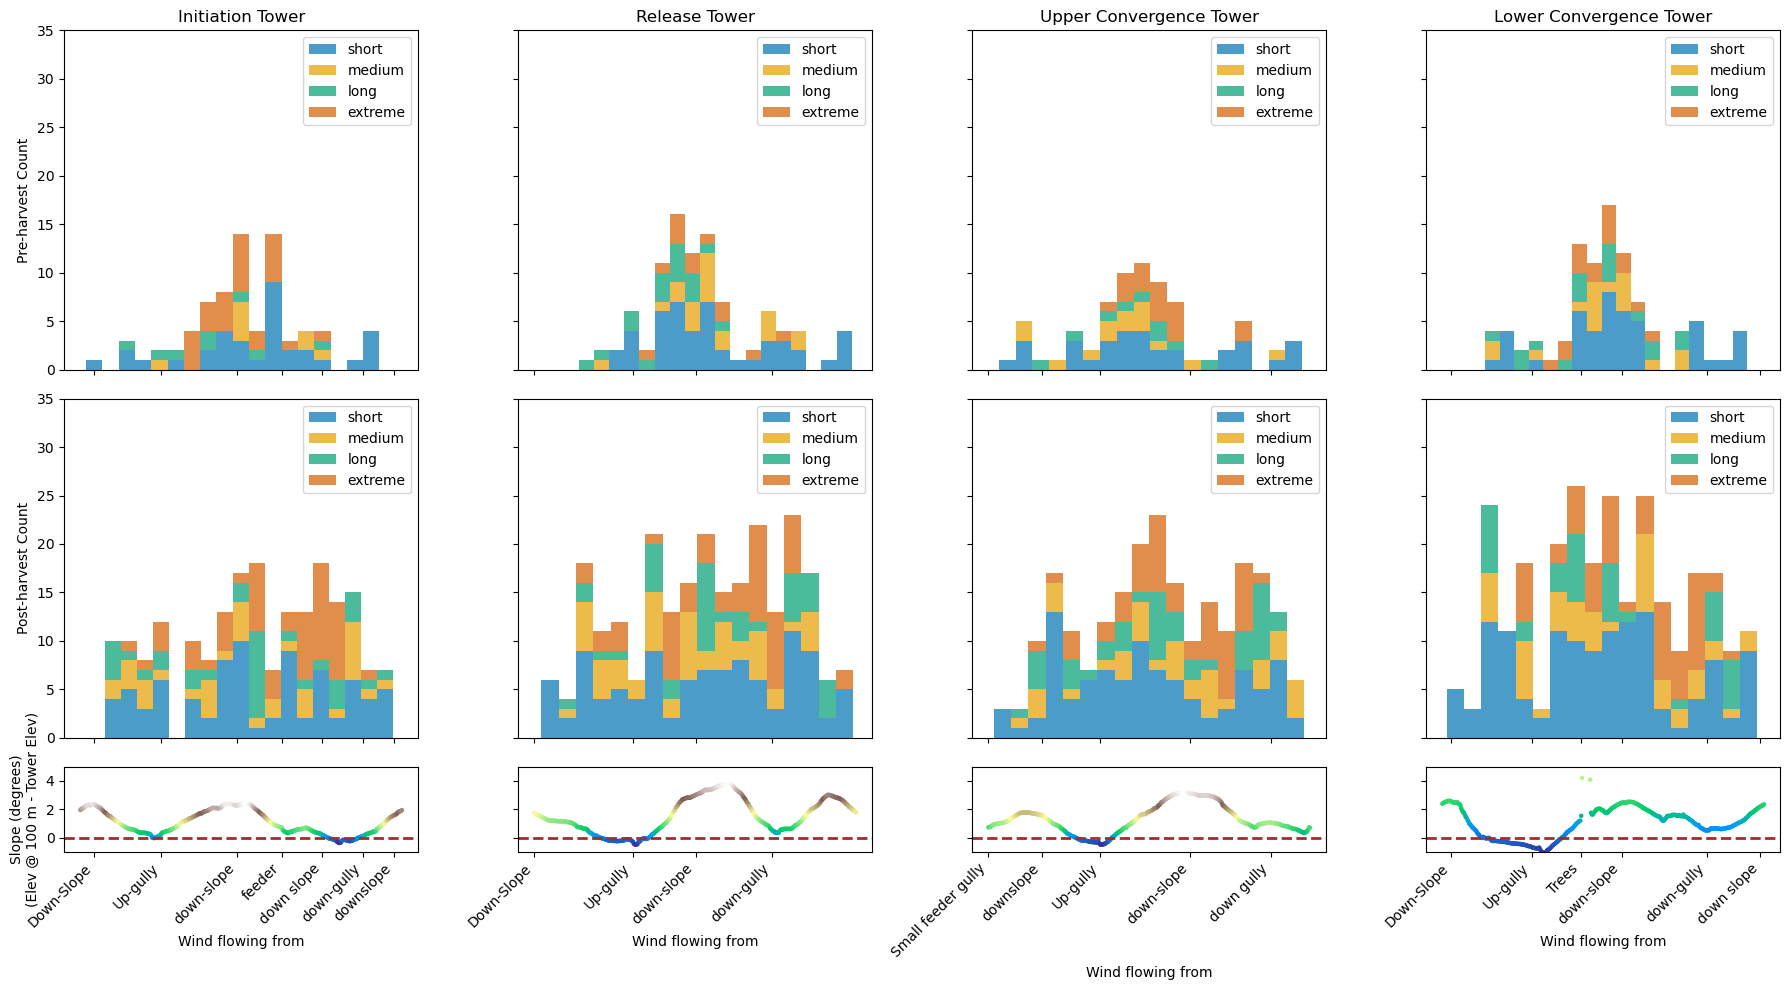

In [62]:
inv_classes =  ['short', 'medium', 'long', 'extreme'] # ['micro', 'short', 'medium', 'long', 'extreme']
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"] # ["#56B4E9", "#0072B2", "#E69F00", "#009E73", "#D55E00"]
y_count_min_max = [0, 35]

# plot two rows of subplots
# Use the gridspec_kw argument to specify the height ratio of the rows
fig, axes = plt.subplots(
    3, 4, figsize=(18, 10), sharex='col', sharey='row',    gridspec_kw={'height_ratios': [1, 1, 0.25]}
)

for ax, tower_key in zip(axes[0], towers.keys()):
    print(tower_key)
    dir_col = [col for col in invdf.columns if tower_key[:-1] in col.lower() and 'dir_10m' in col.lower()][0]
    print(dir_col)
    x = []
    for inv_class in inv_classes:
        x.append(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class) & (invdf['harvest status']=='pre-harvest')][dir_col])
        # ax.hist(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class)][dir_col]
        #         , histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_class)
    ax.hist(x, histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_classes, color=colors, density=False)
    ax.set_title(f'{towers[tower_key]["label"]}') # (f'Frequency of Wind Direction at 10 m - {towers[tower_key]["label"]}')
    ax.legend()
    ax.set_ylim(y_count_min_max)
    
    
for ax, tower_key in zip(axes[1], towers.keys()):
    dir_col = [col for col in invdf.columns if tower_key[:-1] in col.lower() and 'dir_10m' in col.lower()][0]
    x = []
    print(dir_col)
    for inv_class in inv_classes:
        x.append(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class) & (invdf['harvest status']=='post-harvest')][dir_col])
        # ax.hist(invdf[(invdf['Inv location'].str.lower().str.contains(tower_key[:-1])) & (invdf['Inv Class'].str.lower() == inv_class)][dir_col]
        #         , histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_class)
    ax.hist(x, histtype='bar', stacked=True, bins=18, alpha=0.7, label=inv_classes, color=colors, density=False)
    ax.legend()
    ax.set_ylim(y_count_min_max)

for ax, tower_key in zip(axes[2], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points[elevation_points['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['slope_degrees'],
                    s=5, c=tower_points['slope_degrees'], cmap='terrain')
    
    ax.set_xlabel('Wind flowing from')
    ax.set_ylim(-1, 5)
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
        
    # Set custom cardinal ticks and labels
    if tower_key in tower_dir_labels:
        ax.set_xticks(tower_dir_labels[tower_key]['cardinal_ticks'])
        ax.set_xticklabels(tower_dir_labels[tower_key]['cardinal_labels'], rotation=45, ha='right')

axes[0,0].set_ylabel('Pre-harvest Count')
axes[1,0].set_ylabel('Post-harvest Count')
axes[2,0].set_ylabel('Slope (degrees)\n(Elev @ 100 m - Tower Elev)')

plt.tight_layout()
plt.show()